# TODO

## Data Sections
- Exp-to-Non exp productivity ratio matrix
- Domestic Owned Exporter / Non-Exporter KS [All Ps]
- Exporter / Non-Exporter KS for all sizes [All Ps]
- All Firms Exp / nExp KS [Comparison of Ps]


## Hypotheses
- Exporter >= Non-Exporter [All categories]
- Smaller firms are more sensitive to export status
- Less productive firms are more sensitive to export status
- Foreign-Owned firms are less sensitive to export status

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import kstest

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# mpl.rcParams['figure.dpi'] = 300 # Uncomment when getting figures for the paper

In [83]:
def safeint(x): 
    try:
        return int(x.strip().replace(',', ''))
    except:
        return 0
    
fmt_df = pd.DataFrame(
    index=[
        "p10",
        "p25",
        "p50",
        "p75",
        "p90",
    ]
)
df = pd.read_csv("data.csv", encoding="utf-8", low_memory=False)
df.columns = df.columns.str.strip()

num_cols = ['Mean', 'SD', 'p10', 'p25', 'p50', 'p75', 'p90', 'N']
for col in num_cols:
    df[col] = df[col].apply(safeint)
df

,Year,Metric,Dimension,Category,Status,Source,Mean,SD,p10,p25,p50,p75,p90,N
0,2011,GVA per worker,1. All,All,Exporter,ABS,70500,109500,4500,23000,51000,92000,153000,178200
1,2012,GVA per worker,1. All,All,Exporter,ABS,71500,428500,4000,22500,48500,90000,155500,190100
2,2013,GVA per worker,1. All,All,Exporter,ABS,73500,97000,5000,21500,49000,92500,162500,210400
3,2014,GVA per worker,1. All,All,Exporter,ABS,78500,106500,7000,26500,54500,99500,171500,204550
4,2015,GVA per worker,1. All,All,Exporter,ABS,72500,247500,6500,23500,52000,93000,154000,210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2018,GVA per worker,6. Region,Yorkshire and The Humber,Non-Exporter,ABS-TiG,41500,51500,4500,11000,25000,54000,94000,144750
1796,2019,GVA per worker,6. Region,Yorkshire and The Humber,Non-Exporter,ABS-TiG,38500,57500,2500,8000,20000,51000,102500,138800
1797,2020,GVA per worker,6. Region,Yorkshire and The Humber,Non-Exporter,ABS-TiG,30500,41500,1000,8000,24000,39500,70500,140750
1798,2021,GVA per worker,6. Region,Yorkshire and The Humber,Non-Exporter,ABS-TiG,39000,93000,2000,11000,26500,49000,82500,151750


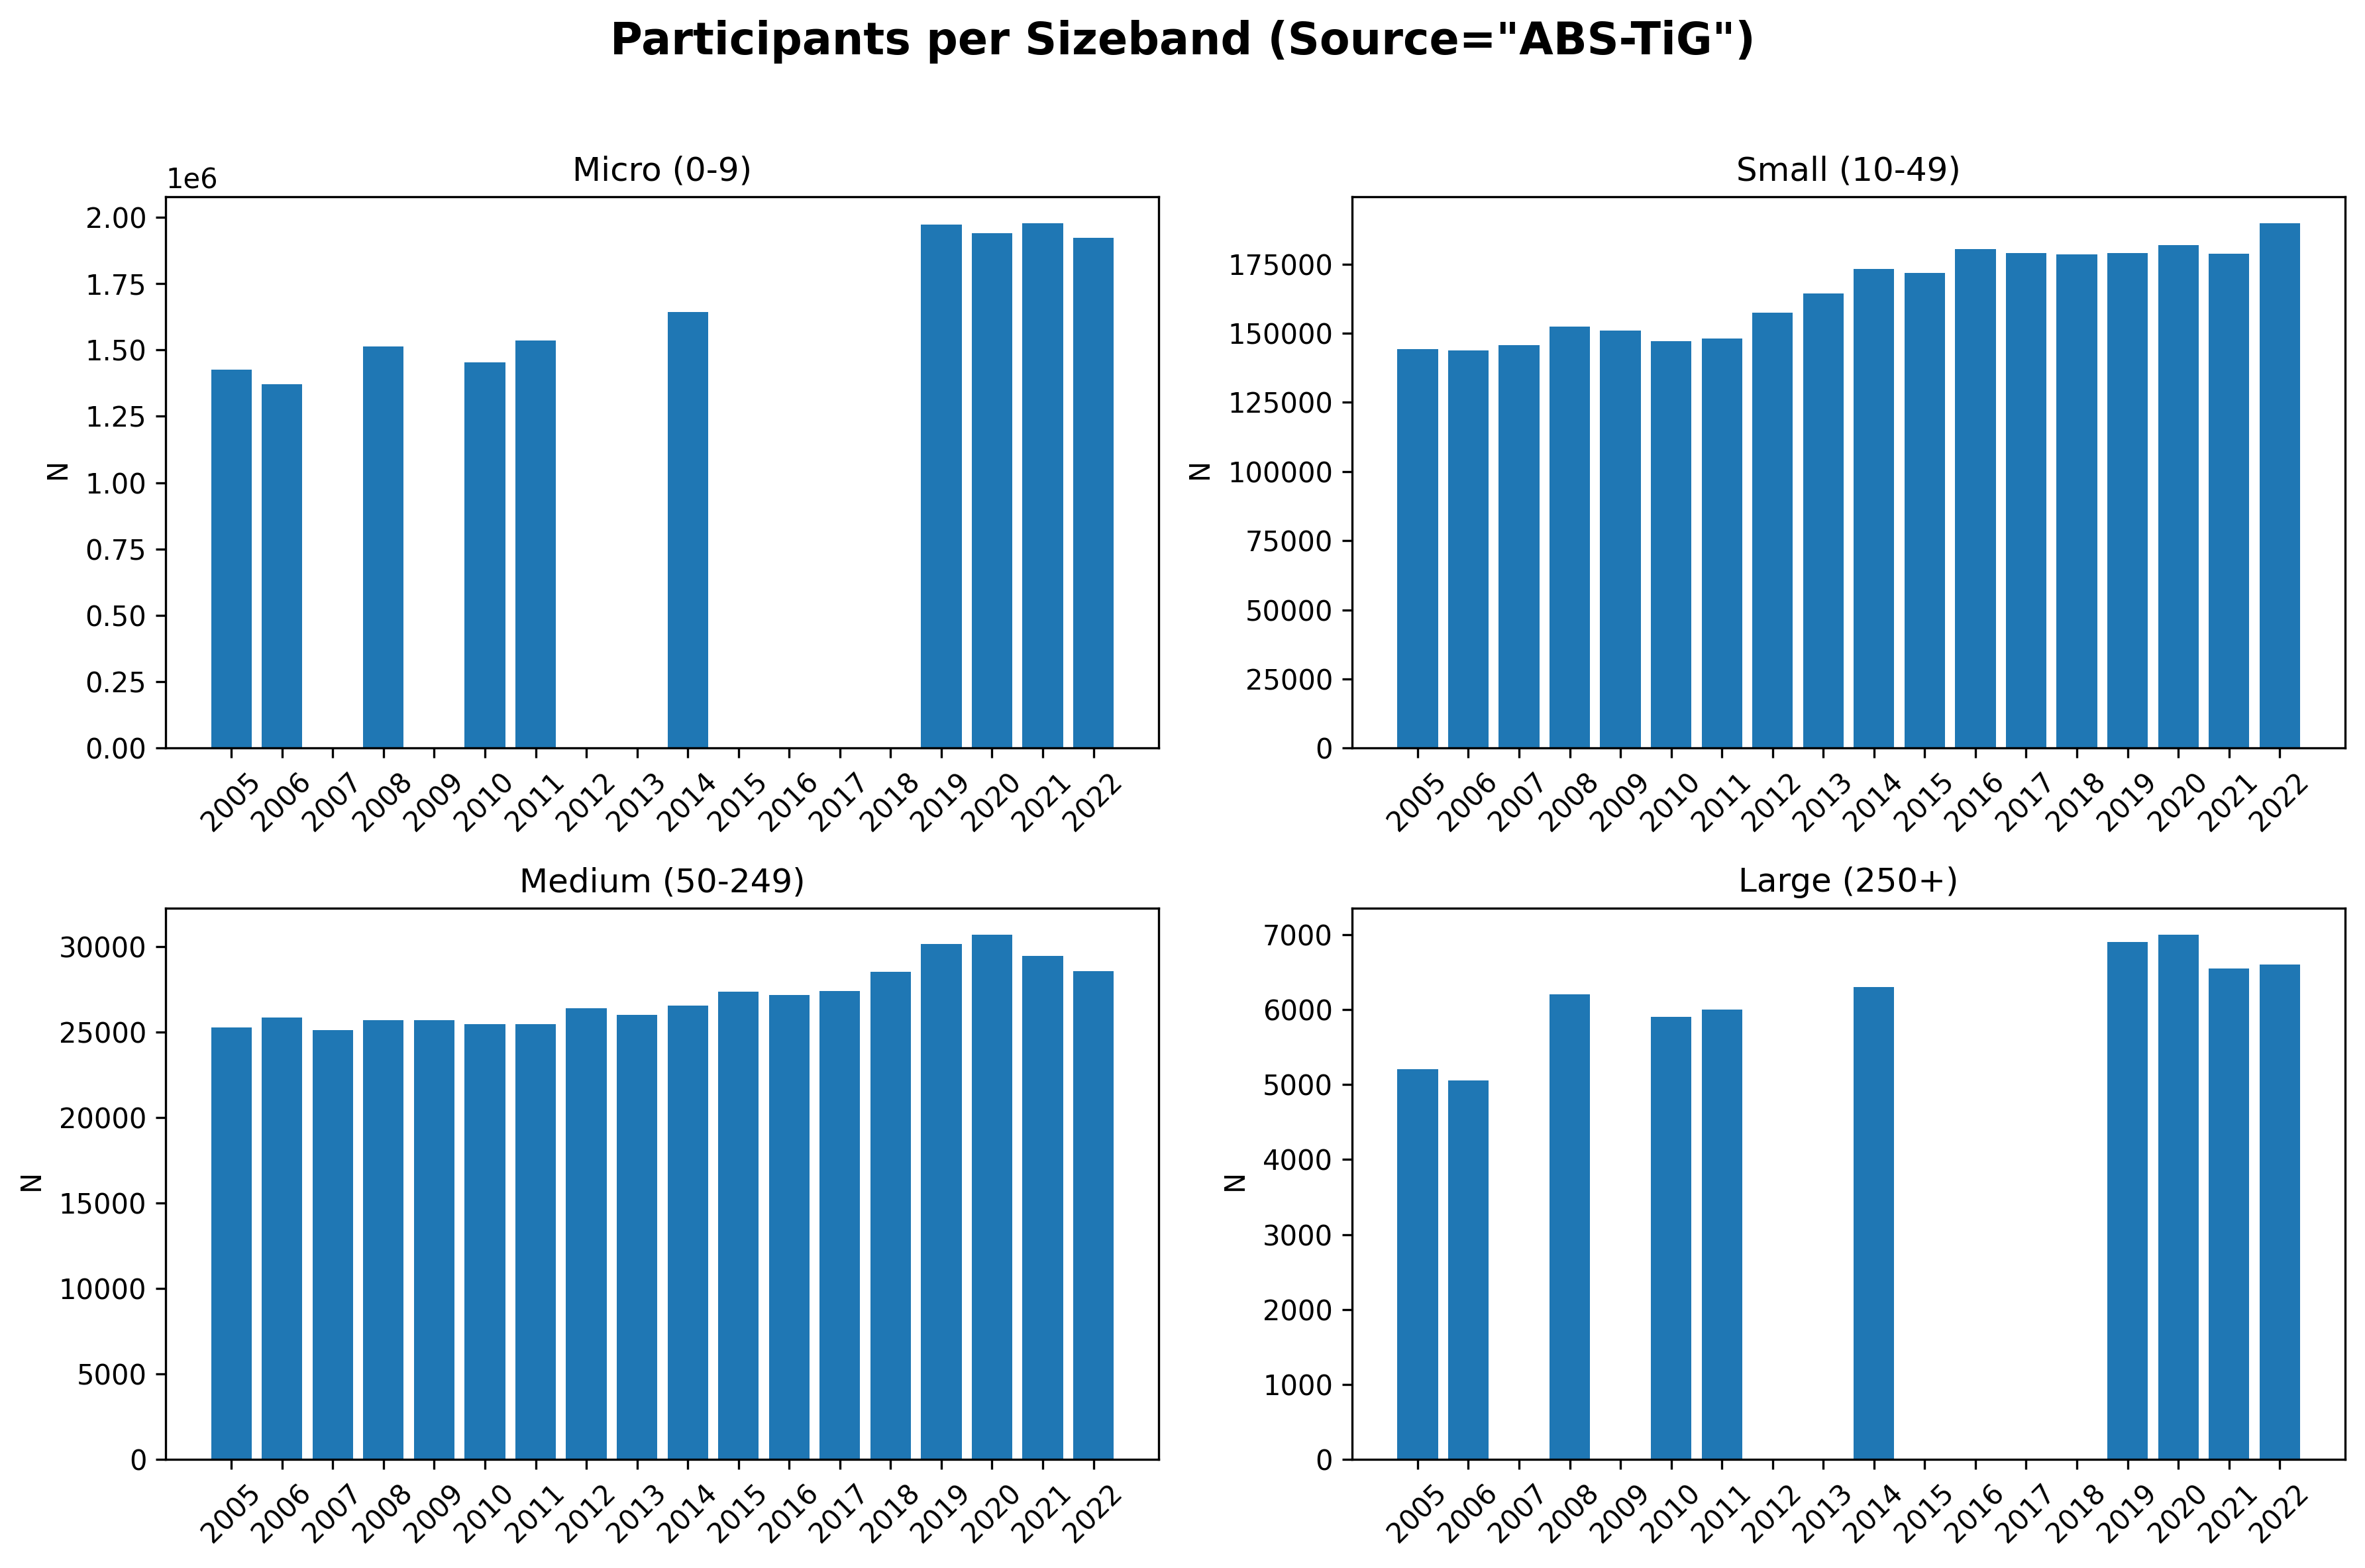

In [85]:
# Participants per Sizeband (source=ABS-TiG)

t = pd.period_range(start='2005', end='2022', freq='Y').year.astype(str)
sizeband_df = df.loc[(df['Dimension'] == '2. Sizeband') & (df['Source'] == 'ABS-TiG'), :]
micro = sizeband_df.loc[sizeband_df['Category'] == 'Micro (0-9)', :]
small = sizeband_df.loc[sizeband_df['Category'] == 'Small (10-49)', :]
medium = sizeband_df.loc[sizeband_df['Category'] == 'Medium (50-249)', :]
large = sizeband_df.loc[sizeband_df['Category'] == 'Large (250+)', :]

microN = micro.groupby('Year')['N'].sum().values
smallN = small.groupby('Year')['N'].sum().values
mediumN = medium.groupby('Year')['N'].sum().values
largeN = large.groupby('Year')['N'].sum().values



fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.flatten()

ax[0].bar(t, microN)
ax[0].set_title('Micro (0-9)')
ax[0].set_ylabel(r"$\mathrm{N}$")
ax[0].tick_params(axis='x', rotation=45)

ax[1].bar(t, smallN)
ax[1].set_title('Small (10-49)')
ax[1].set_ylabel(r"$\mathrm{N}$")
ax[1].tick_params(axis='x', rotation=45)

ax[2].bar(t, mediumN)
ax[2].set_title('Medium (50-249)')
ax[2].set_ylabel(r"$\mathrm{N}$")
ax[2].tick_params(axis='x', rotation=45)

ax[3].bar(t, largeN)
ax[3].set_title('Large (250+)')
ax[3].set_ylabel(r"$\mathrm{N}$")
ax[3].tick_params(axis='x', rotation=45)


plt.suptitle('Participants per Sizeband (Source="ABS-TiG")', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

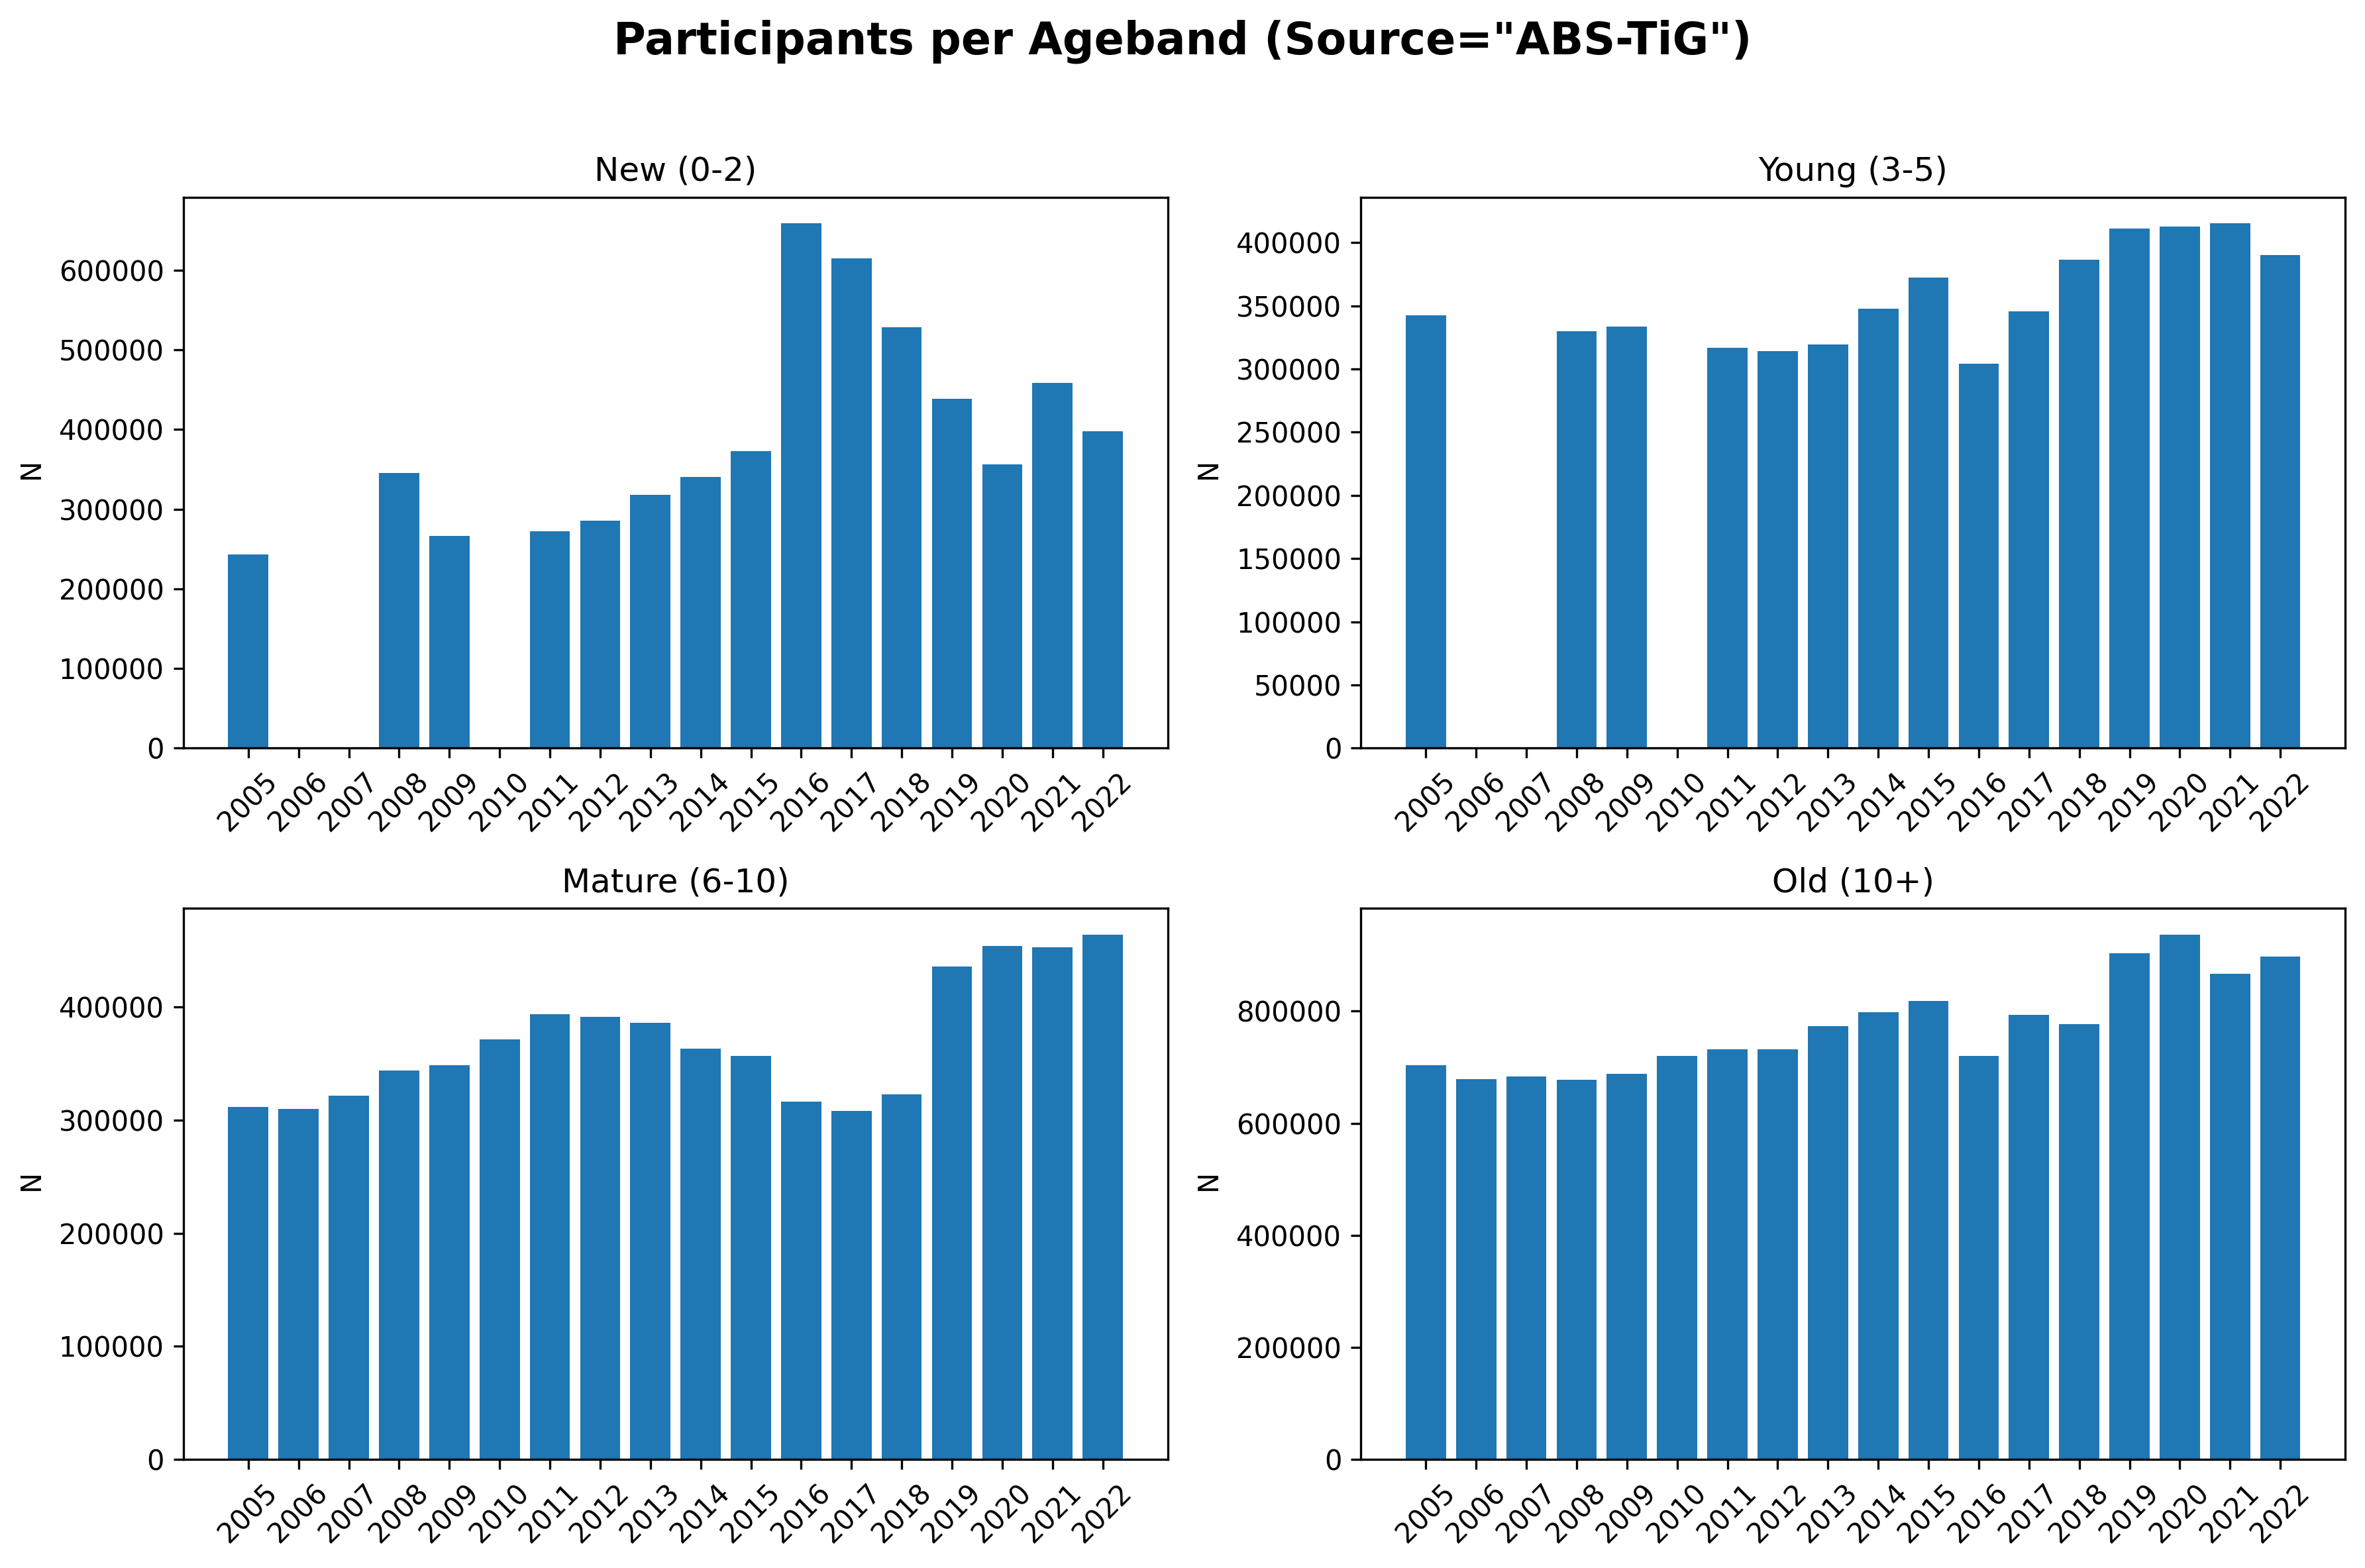

In [89]:
# Participants per Ageband (source=ABS-TiG)
ageband_df = df.loc[(df['Dimension'] == '5. Ageband') & (df['Source'] == 'ABS-TiG'), :]
new = ageband_df.loc[ageband_df['Category'] == 'New (0-2)', :]
young = ageband_df.loc[ageband_df['Category'] == 'Young (3-5)', :]
mature = ageband_df.loc[ageband_df['Category'] == 'Mature (6-10)', :]
old = ageband_df.loc[ageband_df['Category'] == 'Old (10+)', :]

newN = new.groupby('Year')['N'].sum().values
youngN = young.groupby('Year')['N'].sum().values
matureN = mature.groupby('Year')['N'].sum().values
oldN = old.groupby('Year')['N'].sum().values

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.flatten()

ax[0].bar(t, newN)
ax[0].set_title('New (0-2)')
ax[0].set_ylabel(r"$\mathrm{N}$")
ax[0].tick_params(axis='x', rotation=45)

ax[1].bar(t, youngN)
ax[1].set_title('Young (3-5)')
ax[1].set_ylabel(r"$\mathrm{N}$")
ax[1].tick_params(axis='x', rotation=45)

ax[2].bar(t, matureN)
ax[2].set_title('Mature (6-10)')
ax[2].set_ylabel(r"$\mathrm{N}$")
ax[2].tick_params(axis='x', rotation=45)

ax[3].bar(t, oldN)
ax[3].set_title('Old (10+)')
ax[3].set_ylabel(r"$\mathrm{N}$")
ax[3].tick_params(axis='x', rotation=45)

plt.suptitle('Participants per Ageband (Source="ABS-TiG")', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

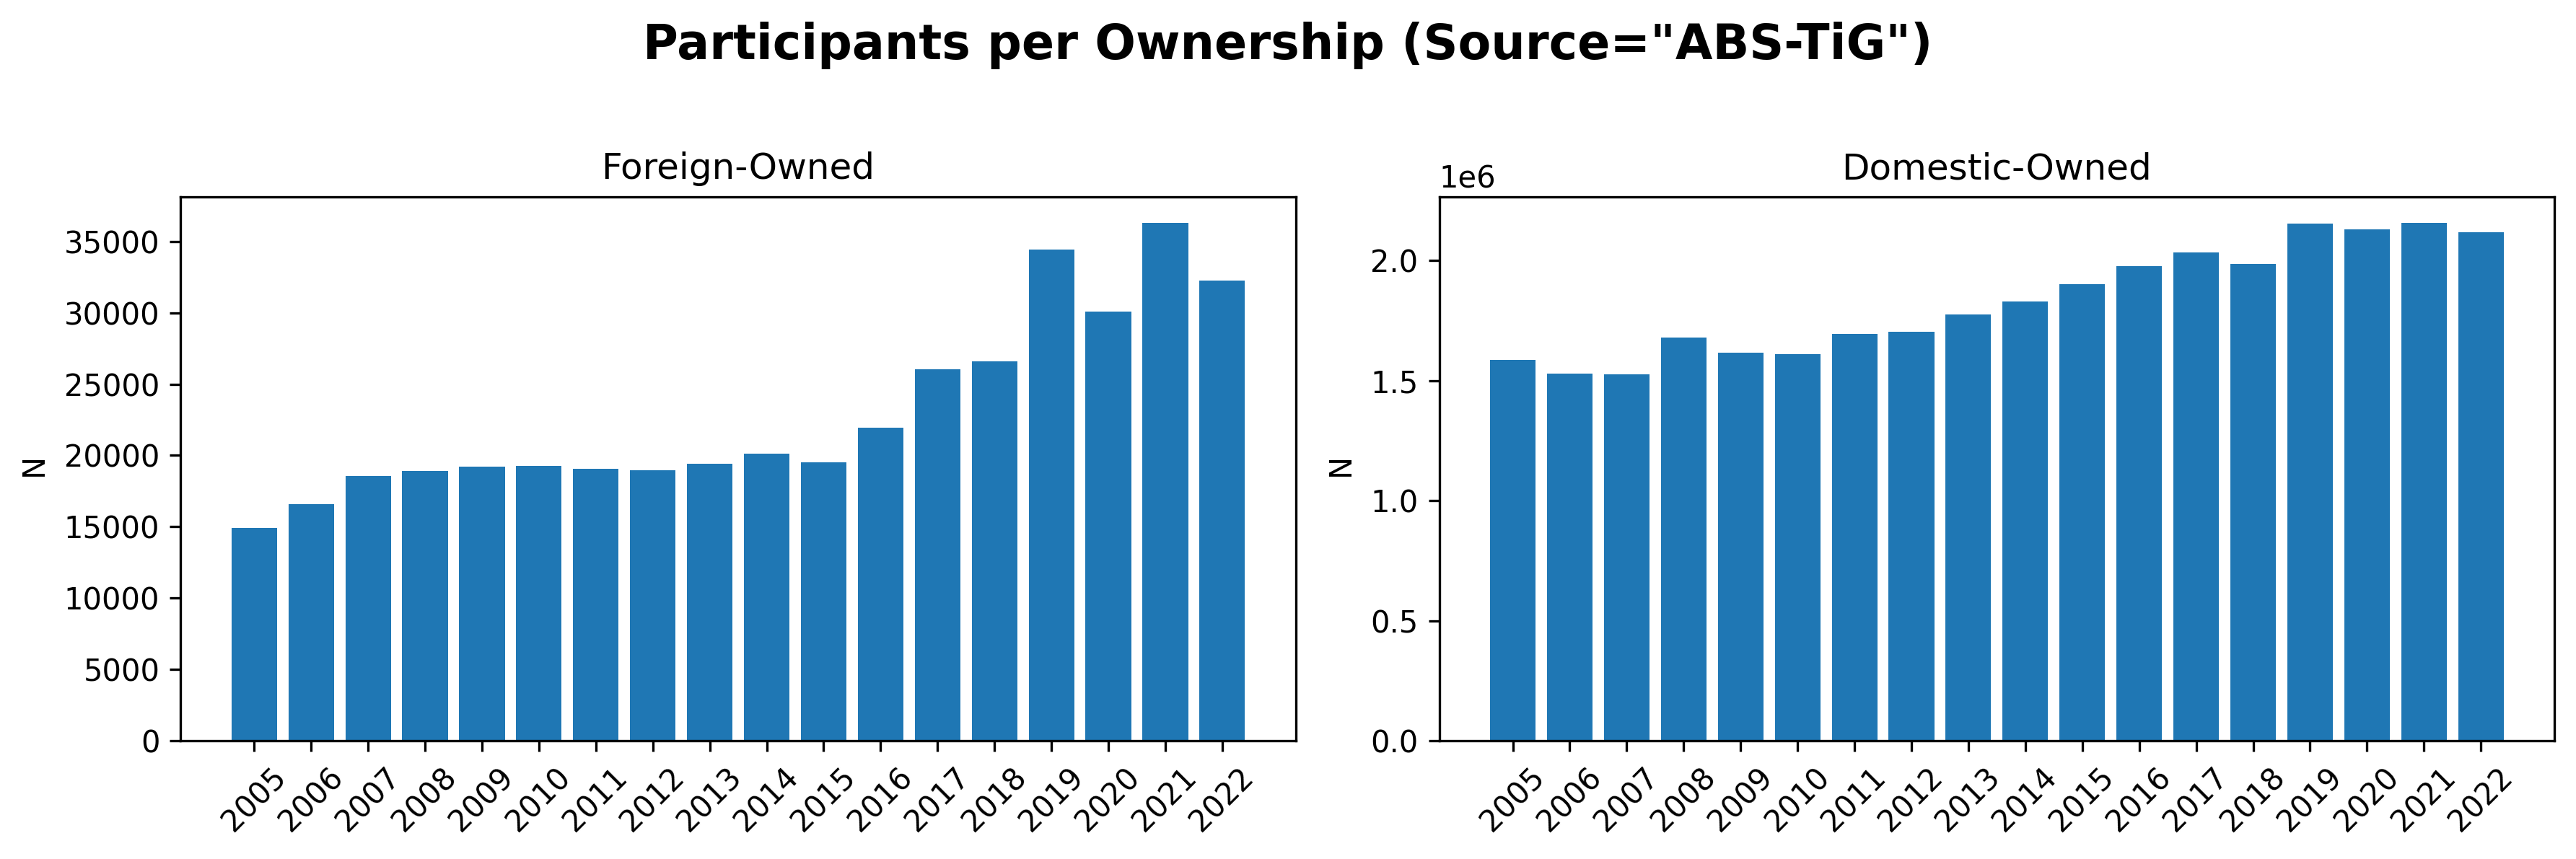

In [91]:
# Participants per Ownership (source=ABS-TiG)
ownership_df = df.loc[(df['Dimension'] == '4. Foreign Ownership') & (df['Source'] == 'ABS-TiG'), :]
foreign = ownership_df.loc[ownership_df['Category'] == 'Foreign-Owned', :]
domestic = ownership_df.loc[ownership_df['Category'] == 'Domestic-Owned', :]

foreignN = foreign.groupby('Year')['N'].sum().values
domesticN = domestic.groupby('Year')['N'].sum().values

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax = ax.flatten()

ax[0].bar(t, foreignN)
ax[0].set_title('Foreign-Owned')
ax[0].set_ylabel(r"$\mathrm{N}$")
ax[0].tick_params(axis='x', rotation=45)

ax[1].bar(t, domesticN)
ax[1].set_title('Domestic-Owned')
ax[1].set_ylabel(r"$\mathrm{N}$")
ax[1].tick_params(axis='x', rotation=45)

plt.suptitle('Participants per Ownership (Source="ABS-TiG")', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [3]:
df.loc[df['Dimension'] == '2. Sizeband']

,Year,Metric,Dimension,Category,Status,Source,Mean,SD,p10,p25,p50,p75,p90,N
60,2011,GVA per worker,2. Sizeband,Large (250+),Exporter,ABS,"96,500","307,500","18,500","37,000","64,500","107,000","176,500","2,150"
61,2012,GVA per worker,2. Sizeband,Large (250+),Exporter,ABS,"97,500","255,500","19,000","37,000","64,500","107,500","182,000","2,250"
62,2013,GVA per worker,2. Sizeband,Large (250+),Exporter,ABS,"96,000","216,500","20,000","39,000","67,000","109,500","178,500","2,400"
63,2014,GVA per worker,2. Sizeband,Large (250+),Exporter,ABS,"99,000","207,000","22,500","40,500","70,000","114,000","183,500","2,500"
64,2015,GVA per worker,2. Sizeband,Large (250+),Exporter,ABS,"97,500","217,000","24,000","41,000","68,000","110,500","184,500","2,600"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2018,GVA per worker,2. Sizeband,Small (10-49),Non-Exporter,ABS-TiG,"42,500","100,000","7,000","14,500","29,000","54,000","86,000","140,000"
296,2019,GVA per worker,2. Sizeband,Small (10-49),Non-Exporter,ABS-TiG,"43,000","120,500","6,000","14,000","30,500","55,000","89,500","139,300"
297,2020,GVA per worker,2. Sizeband,Small (10-49),Non-Exporter,ABS-TiG,"39,500","144,500","2,000","8,500","25,000","50,000","85,500","144,850"
298,2021,GVA per worker,2. Sizeband,Small (10-49),Non-Exporter,ABS-TiG,"44,500","302,000","3,000","11,000","28,000","57,500","97,500","140,700"


In [19]:
kstest(
    df.loc[df['Status'] == 'Exporter', 'Mean'],
    df.loc[df['Status'] == 'Non-Exporter', 'Mean']
)

KstestResult(statistic=np.float64(0.6377777777777778), pvalue=np.float64(2.3803919609674216e-172), statistic_location=' 56,000 ', statistic_sign=np.int8(-1))

In [32]:
Qs = ["p10", "p25", "p50", "p75", "p90"]
sizes = ['Small (10-49)', 'Medium (50-249)', 'Large (250+)']
status = ["Exporter", "Non-Exporter"]

exp_nexp_df = fmt_df.copy()
exp_nexp_df['Small (10-49)'] = np.nan
exp_nexp_df['Medium (50-249)'] = np.nan
exp_nexp_df['Large (250+)'] = np.nan

for i, q in enumerate(Qs):
    for size in sizes:
        samp1 = df.loc[(df["Status"] == "Exporter") & (df['Category'] == size), q]
        samp2 = df.loc[(df["Status"] == "Non-Exporter") & (df['Category'] == size), q]
        exp_nexp_df.loc[q, size] = kstest(samp1, samp2).pvalue
print("Exporter vs Non-Exporter KS test per sizeband [PVAL]")
exp_nexp_df.round(6)

Exporter vs Non-Exporter KS test per sizeband [PVAL]


,Small (10-49),Medium (50-249),Large (250+)
p10,0.000000,0.000000,0.000006
p25,0.000000,0.000000,0.000001
p50,0.000000,0.000000,0.000001
p75,0.000293,0.000024,0.000900
p90,0.000000,0.000006,0.000900


In [ ]:
sizes = ['Small (10-49)', 'Medium (50-249)', 'Large (250+)']

sizecomp_exp_df = pd.DataFrame(
    columns=sizes,
    index=sizes
)

samp = df.loc[df['Status'] == 'Exporter']
for i in sizes:
    for j in sizes:
        samp1 = samp.loc[samp['Category'] == i, 'p50']
        samp2 = samp.loc[samp['Category'] == j, 'p50']
        sizecomp_exp_df.loc[i, j] = kstest(samp1, samp2).pvalue

print("Exporter Sizeband Comparison KS test [PVAL]")
sizecomp_exp_df.round(6)

Exporter Sizeband Comparison KS test [PVAL]


,Small (10-49),Medium (50-249),Large (250+)
Small (10-49),1.0,0.392945,0.000001
Medium (50-249),0.392945,1.0,0.000293
Large (250+),0.000001,0.000293,1.0


In [15]:
sizecomp_nexp_df = pd.DataFrame(
    columns=sizes,
    index=sizes
)

samp = df.loc[df['Status'] == 'Non-Exporter']
for i in sizes:
    for j in sizes:
        samp1 = samp.loc[samp['Category'] == i, 'p50']
        samp2 = samp.loc[samp['Category'] == j, 'p50']
        sizecomp_nexp_df.loc[i, j] = kstest(samp1, samp2).pvalue

print("Non-Exporter Sizeband Comparison KS test [PVAL]")
sizecomp_nexp_df.round(6)

Non-Exporter Sizeband Comparison KS test [PVAL]


,Small (10-49),Medium (50-249),Large (250+)
Small (10-49),1.0,0.000001,0.070888
Medium (50-249),0.000001,1.0,0.03458
Large (250+),0.070888,0.03458,1.0


In [28]:
Q_comp_df = pd.DataFrame(
    columns=['Foreign-Owned', 'Domestic-Owned'],
    index=Qs
)
for i in Qs:
    for j in Q_comp_df.columns:
        samp1 = df.loc[(df['Category'] == j) & (df['Status'] == 'Exporter'), i]
        samp2 = df.loc[(df['Category'] == j) & (df['Status'] == 'Non-Exporter'), i]
        Q_comp_df.loc[i, j] = kstest(samp1, samp2).pvalue

print("Exporter vs Non-Exporter KS test per ownership type [PVAL]")
Q_comp_df.round(6)

Exporter vs Non-Exporter KS test per ownership type [PVAL]


,Foreign-Owned,Domestic-Owned
p10,0.000006,0.000001
p25,0.0,0.0
p50,0.0,0.0
p75,0.594071,0.0
p90,0.594071,0.000001
